# Project Title: H1B visa analytics
 
Introduction to Data Science, University of Utah
 


# Background and Motivation
 
It’s hard to overstate the significance and complexity of the H-1B visa system in the U.S. It is the country’s largest guest worker visa program, and an important channel for high-skilled immigration. It allows companies to hire foreign workers for specialized jobs that can be challenging to fill. It has benefited the tech industry enormously, and other sectors, including health care, science, and finance, have also used it to fill gaps in their workforces.

But in April, just after U.S. Citizen and Immigration Services (USCIS) conducted its annual lottery for selecting H-1B visas (it received 199,000 petitions for the available 85,000 visas), President Trump signed an executive order that will put H-1B and similar programs under new scrutiny.

It’s very tough decision for the employers to decide for them to shortlist the employee for filing their H1B visa file. Every employer wants to recruit hihgly skilled workers in their organization. This creates competition among them and hence we can see that there are lot more number of applications for H1B visa then the available visas.

On the other side, from the prospective of the employee, they also want to acquire H1B visa to work in United States. They are working hard, competing with enormous number of employees, developing their skill set, updating with advance technologies. But everybody doesn’t get paid in return even after deserving it. Employers exploit the employees by making fake promises of filing H1B visas, by not filing their visa application properly and many more.

It is important for both employer and employee to get the visa status approved for employees. By examining the visa petitions we hope that we can come up with the study which could suggest us to consider several factors for success rate of H1B visa petition approval.


# Project Objectives
 
The primary objective of our project is to analyze the H1B visa petition features which determines the success rate of visa application getting Certified or Denied. 

We are also aiming to pinpoint the states, job titles, city and best salaries a H1B applicant can get by accesing our data analysis results, we aim to create interactive visualization that can give a virtual tour of the current scenario in with regards to H1b visas.

We will analyze different parameters of H1B Visa Dataset like employer’s details, agent details, job titles etc. and try to identify factors that can help gain positive response of the petition and further decisions for filing the H1B visa. The analysis will suggest the effective variable for our prediction variable (Visa application status).


# Data
 
We are using the data from the Office of Foreign Labor Certification (OFLC) which generates program data that is essential both for internal assessment of program effectiveness and for providing the Department's external stakeholders with useful information about the immigration programs administered by OFLC. Dataset was obtained from OFLC website in csv format. We are using the dataset of last two year 2016 and 2017.
<br>
<br>
H1B visa petition dataset: https://www.foreignlaborcert.doleta.gov/performancedata.cfm 
<br>
<br>
Dataset File Structure 2017: https://www.foreignlaborcert.doleta.gov/pdf/PerformanceData/2017/H-1B_FY17_Record_Layout.pdf 
<br>
<br>
Dataset File Structure 2016: https://www.foreignlaborcert.doleta.gov/docs/Performance_Data/Disclosure/FY15-FY16/H-1B_FY16_Record_Layout.pdf


# Importing Data and Setup

In [2]:
# imports and setup 
import pandas as pd
import scipy as sc
import numpy as np
import plotly
import statsmodels.formula.api as sm
import plotly.plotly as py
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
import seaborn as sns; sns.set()

from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML
from wordcloud import WordCloud, STOPWORDS

plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)


plotly.tools.set_credentials_file(username='PLS54913', api_key='cwJ9ivFdzgzgXdhzYLT5')


In [5]:
#importing csv file using pandas librabry
df16 = pd.read_csv ('dataset16.csv',parse_dates=['DECISION_DATE'])
df17 = pd.read_csv ('dataset17.csv',parse_dates=['DECISION_DATE'])

C:\Users\Pratik S\Documents\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning:

Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\Pratik S\Documents\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning:

Columns (14,15,16,24) have mixed types. Specify dtype option on import or set low_memory=False.



# Data Processing and Filtering

We prepared our data by 
* removing garbage value,irrelevant variables, merging the dataset for the year 2016-2017.
* adding a column YEAR and assigning it a value of 2016 or 2017, based on the financial year a decision is made on the case by the authorities.
* In both year dataset, we have three columns(PW_SOURCE','NAIC_CODE', 'H-1B_DEPENDENT) with same information but column name is different. So, we change the name of the column of 2017 year to the name of column of 2016

There are 40 variables present in the 2016 H-1B dataset, whose data dictionary can be found here.The 2017 H-1B dataset contains 52 variables, whose data dictionary can be found here.These two datasets are merged to create a single dataframe containing both 2016 and 2017 Year data. Out of the variables present in both the datasets, only 40 are common, So, we keep only those 40 variables in our dataset.

In [6]:
#adding YEAR column
df16['YEAR']= 2016
df17['YEAR']= 2017
#renaming the columns
df17.rename(columns={'PW_SOURCE': 'PW_WAGE_SOURCE', 'NAICS_CODE': 'NAIC_CODE', 'H1B_DEPENDENT': 'H-1B_DEPENDENT'}, inplace=True)
#Merging the dataset
keys = [('df16'), ('df17')]
type(df16)
type(df17)
df = [df16,df17]
big_df = pd.concat(df, keys=keys)
big_cl_df_main = big_df.loc[:,['CASE_NUMBER','CASE_STATUS','CASE_SUBMITTED','DECISION_DATE','VISA_CLASS','EMPLOYMENT_START_DATE','EMPLOYMENT_END_DATE','EMPLOYER_NAME','EMPLOYER_ADDRESS','EMPLOYER_CITY','EMPLOYER_STATE','EMPLOYER_POSTAL_CODE','EMPLOYER_COUNTRY','EMPLOYER_PROVINCE','EMPLOYER_PHONE','EMPLOYER_PHONE_EXT','AGENT_ATTORNEY_NAME','AGENT_ATTORNEY_CITY','AGENT_ATTORNEY_STATE','JOB_TITLE','SOC_CODE','SOC_NAME','NAIC_CODE','TOTAL_WORKERS','FULL_TIME_POSITION','PREVAILING_WAGE','PW_UNIT_OF_PAY', 'PW_WAGE_SOURCE','PW_SOURCE_YEAR','PW_SOURCE_OTHER','WAGE_RATE_OF_PAY_FROM','WAGE_RATE_OF_PAY_TO','WAGE_UNIT_OF_PAY','H-1B_DEPENDENT','WILLFUL_VIOLATOR','WORKSITE_CITY','WORKSITE_COUNTY','WORKSITE_STATE','WORKSITE_POSTAL_CODE','ORIGINAL_CERT_DATE','YEAR']]

In [7]:
big_cl_df=pd.DataFrame(big_cl_df_main)

Following are the columns that are present in the data and the definition of each column can be found here 
https://www.foreignlaborcert.doleta.gov/pdf/PerformanceData/2017/H-1B_FY17_Record_Layout.pdf 

In [6]:
big_cl_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1272502 entries, (df16, 0) to (df17, 624649)
Data columns (total 41 columns):
CASE_NUMBER              1272502 non-null object
CASE_STATUS              1272502 non-null object
CASE_SUBMITTED           1272502 non-null object
DECISION_DATE            1272502 non-null datetime64[ns]
VISA_CLASS               1272502 non-null object
EMPLOYMENT_START_DATE    1272456 non-null object
EMPLOYMENT_END_DATE      1272447 non-null object
EMPLOYER_NAME            1272431 non-null object
EMPLOYER_ADDRESS         1272490 non-null object
EMPLOYER_CITY            1272481 non-null object
EMPLOYER_STATE           1272450 non-null object
EMPLOYER_POSTAL_CODE     1272463 non-null object
EMPLOYER_COUNTRY         1175992 non-null object
EMPLOYER_PROVINCE        13788 non-null object
EMPLOYER_PHONE           1175991 non-null object
EMPLOYER_PHONE_EXT       62134 non-null object
AGENT_ATTORNEY_NAME      1272502 non-null object
AGENT_ATTORNEY_CITY      757662 non

In [80]:
big_cl_df.describe()

,NAIC_CODE,TOTAL_WORKERS,PREVAILING_WAGE,PW_SOURCE_YEAR,YEAR
count,949757.000000,949761.000000,9.497610e+05,949700.000000,949761.000000
mean,442028.294163,1.982515,9.020441e+04,2015.701558,2016.482665
std,200271.287673,4.878563,1.508206e+06,7.653023,0.499700
min,23.000000,0.000000,0.000000e+00,0.000000,2016.000000
25%,453210.000000,1.000000,5.790700e+04,2015.000000,2016.000000
50%,541511.000000,1.000000,6.882700e+04,2016.000000,2016.000000
75%,541511.000000,1.000000,8.573800e+04,2016.000000,2017.000000
max,928120.000000,169.000000,3.118045e+08,7201.000000,2017.000000


In [9]:
big_cl_df.head(5)

CASE_NUMBER          CASE_STATUS CASE_SUBMITTED DECISION_DATE  \
df16 0  I-200-12240-490687  CERTIFIED-WITHDRAWN      8/27/2012    2015-10-16   
     1  I-200-13053-847481  CERTIFIED-WITHDRAWN      2/25/2013    2016-01-13   
     2  I-200-13088-054259  CERTIFIED-WITHDRAWN      4/23/2013    2015-12-10   
     3  I-200-13144-034110  CERTIFIED-WITHDRAWN      5/24/2013    2016-01-19   
     4  I-200-13172-415116            WITHDRAWN      6/26/2013    2016-05-20   

       VISA_CLASS EMPLOYMENT_START_DATE EMPLOYMENT_END_DATE  \
df16 0       H-1B             2/25/2013           2/24/2016   
     1       H-1B             8/24/2013           8/23/2016   
     2       H-1B             4/29/2013           4/28/2016   
     3       H-1B             10/1/2013           9/30/2016   
     4       H-1B            10/18/2013          10/17/2016   

                                            EMPLOYER_NAME  \
df16 0                             UNIVERSITY OF MICHIGAN   
     1                             GOODMAN NETWORKS, INC.   
     2                          PORTS AMERICA GROUP, INC.   
     3  GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...   
     4                          PEABODY INVESTMENTS CORP.   

                              EMPLOYER_ADDRESS EMPLOYER_CITY  ...   \
df16 0  PIERPONT COMMONS, INTERNATIONAL CENTER     ANN ARBOR  ...    
     1  6400 INTERNATIONAL PARKWAY, SUITE 1000         PLANO  ...    
     2                525 WASHINGTON BOULEVARD   JERSEY CITY  ...    
     3                     1551 WEWATTA STREET        DENVER  ...    
     4                       701 MARKET STREET     ST. LOUIS  ...    

       WAGE_RATE_OF_PAY_TO WAGE_UNIT_OF_PAY H-1B_DEPENDENT WILLFUL_VIOLATOR  \
df16 0                0.00             Year              N                N   
     1                0.00             Year              N                N   
     2          451,100.00             Year              N                N   
     3          600,000.00             Year              N                N   
     4                0.00             Hour              N                N   

       WORKSITE_CITY WORKSITE_COUNTY WORKSITE_STATE WORKSITE_POSTAL_CODE  \
df16 0     ANN ARBOR       WASHTENAW             MI                48109   
     1         PLANO          COLLIN             TX                75093   
     2   JERSEY CITY          HUDSON             NJ                07310   
     3        DENVER          DENVER             CO                80202   
     4     ST. LOUIS       ST. LOUIS             MO                63101   

       ORIGINAL_CERT_DATE  YEAR  
df16 0          8/31/2012  2016  
     1           3/1/2013  2016  
     2          4/29/2013  2016  
     3          5/29/2013  2016  
     4                NaN  2016  

[5 rows x 41 columns]

We are doing following filtering and tranformations tasks 
* Prevailing wages to float, 
* filtering out only the visa that are H1B,the merged dataset has filing records for other kinds of visa processing such as H1-Singapore, H1-Chile etc. So, these records are filtered out to retain only those records corresponding to H-1B data. 
* consider only two application status that is CERTIFIED and DENIED,
* filter the data with employer country only from USA and also take only those rows that have their application status decision after 2016.

In [61]:
#Filtering of various columns and coverting to required datatype
big_cl_df['PREVAILING_WAGE'] = big_cl_df['PREVAILING_WAGE'].str.replace(',','').astype(float)
big_cl_df=big_cl_df.loc[big_cl_df['VISA_CLASS'].isin(['H-1B'])]
big_cl_df=big_cl_df.loc[big_cl_df['CASE_STATUS'].isin(['CERTIFIED','DENIED'])]
big_cl_df=big_cl_df.loc[big_cl_df['EMPLOYER_COUNTRY'].isin(['UNITED STATES OF AMERICA'])]
mask = (big_cl_df['DECISION_DATE'] > '2016-01-01') 
big_cl_df= big_cl_df.loc[mask]

If you observe the data you will see that we have employees having their wages entered on Weekly, Hourly, Bi-weekly and Monthly. To get consistency in the wages we are scaling the wages so that we get yearly salaries for all the employees in the data.

In [64]:
for i in range(0,len(big_cl_df)):
    if(big_cl_df['PW_UNIT_OF_PAY'][i]=='Month'):
        big_cl_df['PREVAILING_WAGE'][i]=big_cl_df['PREVAILING_WAGE'][i]*12
    elif(big_cl_df['PW_UNIT_OF_PAY'][i]=='Week'):
        big_cl_df['PREVAILING_WAGE'][i]=big_cl_df['PREVAILING_WAGE'][i]*52
    elif(big_cl_df['PW_UNIT_OF_PAY'][i]=='Bi-Weekly'):
        big_cl_df['PREVAILING_WAGE'][i]=big_cl_df['PREVAILING_WAGE'][i]*26 
    elif(big_cl_df['PW_UNIT_OF_PAY'][i]=='Hours'):
        big_cl_df['PREVAILING_WAGE'][i]=big_cl_df['PREVAILING_WAGE'][i]*2080

C:\Users\Pratik S\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Pratik S\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Pratik S\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


We have around 1.2M rows in our dataset and this makes it really time consuming to run the scaling programme on the whole dataset again and again which is why we are saving the file in CSV 

In [81]:
big_cl_df.to_csv('big_cl_df_filtered_sample_u.csv')

In [22]:
big_cl_df = pd.read_csv ('big_cl_df_filtered_sample_u.csv')

C:\Users\Pratik S\Documents\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning:

Columns (14,15,24,39) have mixed types. Specify dtype option on import or set low_memory=False.



The merged dataset we have has only 16 variables that are of interest for our analysis. So, variables other than these are dropped from the final dataset.

In [23]:
big_cl_model_df=pd.DataFrame(big_cl_df)
big_cl_df.drop(['EMPLOYMENT_START_DATE','EMPLOYMENT_END_DATE','EMPLOYER_ADDRESS','EMPLOYER_CITY','EMPLOYER_STATE','EMPLOYER_POSTAL_CODE','EMPLOYER_COUNTRY','EMPLOYER_PROVINCE','EMPLOYER_PHONE','EMPLOYER_PHONE_EXT','AGENT_ATTORNEY_CITY','AGENT_ATTORNEY_STATE','SOC_CODE','SOC_NAME','NAIC_CODE','PW_SOURCE_YEAR','PW_SOURCE_OTHER','PW_WAGE_SOURCE','WAGE_RATE_OF_PAY_FROM','WAGE_RATE_OF_PAY_TO','WAGE_UNIT_OF_PAY','WILLFUL_VIOLATOR','WORKSITE_COUNTY','WORKSITE_POSTAL_CODE','ORIGINAL_CERT_DATE'], axis=1, inplace=True)
h1b_df=pd.DataFrame(big_cl_df)
h1b_model_df=pd.DataFrame(h1b_df)

In [14]:
h1b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949761 entries, 0 to 949760
Data columns (total 16 columns):
CASE_NUMBER            949761 non-null object
CASE_STATUS            949761 non-null object
CASE_SUBMITTED         949761 non-null object
DECISION_DATE          949761 non-null object
VISA_CLASS             949761 non-null object
EMPLOYER_NAME          949730 non-null object
AGENT_ATTORNEY_NAME    949761 non-null object
JOB_TITLE              949756 non-null object
TOTAL_WORKERS          949761 non-null int64
FULL_TIME_POSITION     458414 non-null object
PREVAILING_WAGE        949761 non-null float64
PW_UNIT_OF_PAY         949707 non-null object
H-1B_DEPENDENT         949754 non-null object
WORKSITE_CITY          949740 non-null object
WORKSITE_STATE         949748 non-null object
YEAR                   949761 non-null int64
dtypes: float64(1), int64(2), object(13)
memory usage: 115.9+ MB


In [15]:
print(h1b_df.head(5))

          CASE_NUMBER CASE_STATUS CASE_SUBMITTED DECISION_DATE VISA_CLASS  \
0  I-200-15257-186803   CERTIFIED     12/31/2015    07-01-2016       H-1B   
1  I-200-15356-812518   CERTIFIED      1/13/2016    20-01-2016       H-1B   
2  I-200-15357-108174   CERTIFIED     12/30/2015    06-01-2016       H-1B   
3  I-200-15357-900958   CERTIFIED     12/23/2015    04-01-2016       H-1B   
4  I-200-15362-675261   CERTIFIED     12/28/2015    04-01-2016       H-1B   

                       EMPLOYER_NAME   AGENT_ATTORNEY_NAME  \
0                   QUICKLOGIX, INC.         FURO, RUKAYYA   
1  FISERV AUTOMOTIVE SOLUTIONS, INC.        OLIVER, BRENDA   
2                    HBN MEDIA, INC.        KUHAGEN, SCOTT   
3    ADVENTIST HEALTH SYSTEM SUNBELT  GAVICA PEREZ, DENISE   
4             CENTRAL OCEANS USA LLC      ROEPER, JENNIFER   

                                    JOB_TITLE  TOTAL_WORKERS  \
0                                         CEO              1   
1                PRESIDENT, LENDING 

# Exploratory Analysis and Visualization

In [16]:
h1b_df.corr()

,TOTAL_WORKERS,PREVAILING_WAGE,YEAR
TOTAL_WORKERS,1.000000,-0.000323,0.002589
PREVAILING_WAGE,-0.000323,1.000000,0.001795
YEAR,0.002589,0.001795,1.000000


If we do a simple correlation and take a look at the data we realised that the data doesnt have enough numerical values and also encoding the columns wouldnt help in building the model that can help us conclude something concrete, this made us focus more on the vizulization part of the project that would give us good insights on our data and help an individual understand what features he or she should be considering while applying for H1b visa

Although, we have tried modeling the data by the end of the project to understand if by adjusting particular features if we are able to get any acceptable results.

Below is the Bar graph showing the application status for the whole data, Although the number of applications getting CERTIFIED is very high, there are cases where the application is DENIED which gives us the opportunity to analyze the dependancies of various variables that are present in the data.

In [29]:
init_notebook_mode(connected=True)
#Number of Case Status
h1b_stat = pd.DataFrame(big_cl_df_main['CASE_STATUS'].value_counts())

#plot
trace10 = go.Bar(
    x=h1b_stat.index.values,
    y=h1b_stat['CASE_STATUS'],
    text=h1b_stat['CASE_STATUS'],
    textposition = 'auto',
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
    )
)

data = [trace10]
layout = go.Layout(
    title='Number of Different Visa Petition Status',
    xaxis=dict(
        title='Case Status',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='black'
        )
    ),
    yaxis=dict(
        title='Count',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='black'
        )
    )
)
fig12 = go.Figure(data=data, layout=layout)
py.iplot(fig12, filename='file1')

We are ignoring CERTIFIED-WITHDRAWN and WTHDRAWN status as they are completely based on employers discretion which tells us that they will be not dependant on any of the variables as such. Going ahead we will try to understand what all features are effecting the application status and how a applicant can choose the best possible scenario while applying for H1b visa petition.

We are analyzing the petitions for last 2 years i.e. 2016 and 2017. Below visualization provides insights on how the application count has changed for different states over the period of two years.

In [30]:
init_notebook_mode(connected=True)

h1b_2016 = h1b_df[h1b_df['YEAR']==2016]
h16=pd.DataFrame(h1b_2016['WORKSITE_STATE'].value_counts().head(10),)
h1b_2017 = h1b_df[h1b_df['YEAR']==2017]
h17=pd.DataFrame(h1b_2017['WORKSITE_STATE'].value_counts().head(10))

#plot
trace0 = go.Bar(
    x=h16.index.values,
    y=h16['WORKSITE_STATE'],
    name='2016',
    text=h16['WORKSITE_STATE'],
    textposition = 'auto',
    marker=dict(
        color='rgb(49,130,189)'
    )
)
trace1 = go.Bar(
    x=h17.index.values,
    y=h17['WORKSITE_STATE'],
    name='2017',
    text=h17['WORKSITE_STATE'],
    textposition = 'auto',
    marker=dict(
        color='rgb(204,204,204)',
    )
)

data1 = [trace0, trace1]
layout = go.Layout(
    title='Visa Petition Submitted in Top States of US in 2016 & 2017',
    xaxis=dict(
        title='States',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Number of Applications',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig1 = go.Figure(data=data1, layout=layout)
py.iplot(fig1, filename='file2')

Looking at the chart above the application count for 2017 is lesser in most of the states except for Washington, which is quite evident too as the visa policies changed this year resulting in heavy scrunity by the US government. On a whole we can say California, Texas and Newyork are the states filing most number of applications every year.

Although the percentage of DENIED status are less there is a trend that differentiates H1b_Dependant and H1b_Independent companies, H1B_Dependent status is used by the United States Department of Labor to describe an employer who meets a particular threshold in terms of the fraction of the workforce comprising workers in H-1B status. An employer classified as H-1B-dependent needs to include additional attestations in the Labor Condition Application used for the petition of any H-1B beneficiary being offered an annual compensation of less than $60,000 and without a master's degree.

Below we are showing the Top 10 Employer names who's H1B Visa Petition are denied and how the number of denied application varies when the employer is H1B_Dependent as compared to H1B_Independent.

In [31]:
init_notebook_mode(connected=True)

df_3=h1b_df.loc[h1b_df['CASE_STATUS'].isin(['DENIED'])]
df_3=df_3.loc[df_3['H-1B_DEPENDENT'].isin(['N'])]
df_33=df_3[['EMPLOYER_NAME','CASE_STATUS']]
df_333=df_33.groupby('EMPLOYER_NAME',as_index=False).count()
df_NDep=pd.DataFrame(df_333.sort_values('CASE_STATUS',ascending=False).head(10))

df_1=h1b_df.loc[h1b_df['CASE_STATUS'].isin(['DENIED'])]
df_1=df_1.loc[df_1['H-1B_DEPENDENT'].isin(['Y'])]
df_11=df_1[['EMPLOYER_NAME','CASE_STATUS']]
df_111=df_11.groupby('EMPLOYER_NAME',as_index=False).count()
df_Dep=pd.DataFrame(df_111.sort_values('CASE_STATUS',ascending=False).head(10))

trace2 = go.Bar(
    x=df_Dep['EMPLOYER_NAME'],
    y=df_Dep['CASE_STATUS'],
    name='H1B_Dependent',
    text=df_Dep['CASE_STATUS'],
    textposition = 'auto',
    marker=dict(
        color='rgba(222,45,222,0.8)'
    )
)
trace3 = go.Bar(
    x=df_NDep['EMPLOYER_NAME'],
    y=df_NDep['CASE_STATUS'],
    name='H1B_Independent',
    text=df_NDep['CASE_STATUS'],
    textposition = 'auto',
    marker=dict(
        color='rgby(700, 700, 700)',
    )
)

data2 = [trace2, trace3]
layout = go.Layout(
    title='Company Name vs Denied Application',
    xaxis=dict(
        #title='Companies',
        titlefont=dict(
            family='Courier New, monospace',
            size=10,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Number of Applications Denied',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#6f6f6f'
        )
    )
)
fig2 = go.Figure(data=data2, layout=layout)
py.iplot(fig2, filename='file3')

The data shows that H1B_Independent have higher denied cases which tells us that the companies dont pay much attention when applying for visa petitions and the chances of your application getting denied due to improper documentaion is higher for H1B_Independent companies.

We plot the choropleth to understand which state has high mean salaries and find out how the wages and workiste location affect the application status.

In [32]:
init_notebook_mode(connected=True)

df_map=h1b_df[['WORKSITE_STATE','PREVAILING_WAGE']]
df1_grp=df_map.groupby('WORKSITE_STATE',as_index=False).mean()
df1_grp.sort_values('PREVAILING_WAGE')

for col in df1_grp.columns:
    df1_grp[col] = df1_grp[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.1, 'rgb(218,218,235)'],[0.2, 'rgb(188,189,220)'],\
            [0.3, 'rgb(158,154,200)'],[0.4, 'rgb(117,107,177)'],[0.5, 'rgb(84,39,143)'],[0.6, 'rgb(54,30,113)'],
      [0.7, 'rgb(30,20,83)'],[0.8, 'rgb(20,15,59)'],[0.9, 'rgb(10,10,39)'],[1.0, 'rgb(5,5,20)']]
#
data3 = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df1_grp['WORKSITE_STATE'],
        z = df1_grp['PREVAILING_WAGE'].astype(float),
        locationmode = 'USA-states',
        colorbar = dict(
            title = "USD")
        ) ]

layout = dict(
        title = '2016 & 2017 Mean Prevailing Wages offered to H1b Visa petitioner ',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig3 = dict( data=data3, layout=layout )
py.iplot( fig3, filename='file4')

In [33]:
init_notebook_mode(connected=True)

tot_cert = h1b_df[h1b_df['CASE_STATUS'].str.contains('CERTIFIED')]
no_tot_cert = tot_cert.shape[0]
df_st_lst = []
lst_per = []

df_st=h1b_df[['WORKSITE_STATE']]
df_st_array = df_st.WORKSITE_STATE.unique()
df_st_lst = df_st_array.tolist() 
for x in df_st_lst:
    cert_app = tot_cert.loc[tot_cert['WORKSITE_STATE'].isin([x])]
    no_cert = cert_app.shape[0]
    certified_num = (no_cert / no_tot_cert) * 100
    lst_per.append(certified_num)
state_per_df = pd.DataFrame(
    {'States': df_st_lst,
     'Cert_Per': lst_per,
     })
for col in state_per_df.columns:
    state_per_df[col] = state_per_df[col].astype(str)
data4 = [ dict(
        type='choropleth',
        #colorscale = scl,
        autocolorscale = True,
        locations = state_per_df['States'],
        z = state_per_df['Cert_Per'].astype(float),
        locationmode = 'USA-states',
        colorbar = dict(
            title = "% Share")
        ) ]

layout = dict(
        title = '2016 & 2017 Statewise CERTIFIED distribution across USA',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig4 = dict( data=data4, layout=layout )
py.iplot( fig4, filename='file5')

Although, States like California and Texas are having maximum number of acceptance rate of visa petition. But, we observe that it is not unifromly distributed across the whole state, and only few cities having high number of acceptance rate as compare to other cities of the state.
<br>
<br>
On plotting the Wordcloud we can observe the specific cities of California(San Francisco), Texas(Houston) and New York(New York) are having dominance of acceptance rate over other cities.

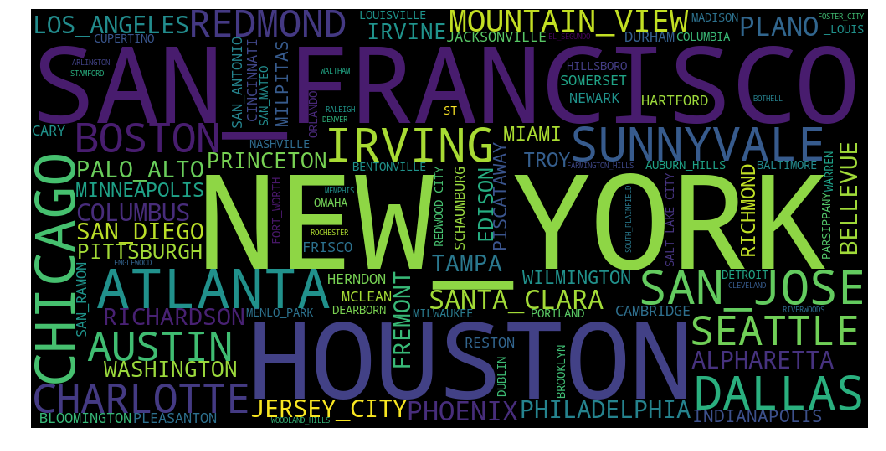

In [21]:
h1b_df['WORKSITE_CITY'] = h1b_df['WORKSITE_CITY'].str.replace(' ','_').astype(str)
dff=h1b_df.loc[h1b_df['CASE_STATUS'].isin(['CERTIFIED'])]
df_ff=dff[['WORKSITE_CITY','CASE_STATUS']]
df_fff=pd.DataFrame(df_ff.groupby('WORKSITE_CITY',as_index=False).count())
df_x=df_fff.sort_values('CASE_STATUS',ascending=False).head(100)
text = df_x
#plot
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(text['WORKSITE_CITY']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [71]:
df_map=h1b_df[['WORKSITE_STATE','JOB_TITLE','PREVAILING_WAGE','YEAR']]
df1_grp_mean=df_map.groupby(['WORKSITE_STATE','JOB_TITLE'],as_index=False).mean()
df1_grp_mean.sort_values('WORKSITE_STATE')

df_map=h1b_df[['WORKSITE_STATE','JOB_TITLE','PREVAILING_WAGE']]
df1_grp_median=df_map.groupby(['WORKSITE_STATE','JOB_TITLE'],as_index=False).median()
df1_grp_median.sort_values('WORKSITE_STATE')

df_map=h1b_df[['WORKSITE_STATE','JOB_TITLE','PREVAILING_WAGE']]
df1_grp_count=df_map.groupby(['WORKSITE_STATE','JOB_TITLE'],as_index=False).count()
df1_grp_count.sort_values('WORKSITE_STATE')

viz_df=pd.merge(df1_grp_median,df1_grp_count,on=['JOB_TITLE','WORKSITE_STATE'])
viz_df.set_index('JOB_TITLE', inplace=False)
viz_df2=pd.merge(df1_grp_mean,viz_df,on=['JOB_TITLE','WORKSITE_STATE'])

viz_df2.to_csv('animetest_df.csv')

In order to visulaize the data in an animated graph we extracted the data as required and saved it in a CSV file and also removed excess data in Excel sheet(The animated chart was overloaded due to high density of data points and crashed multiple times) and renamed the columns as required and created new CSV file namely animeviz_df1.csv. In thh new file we have only considered the sates with alleast 20 applications and more.

To understand how different job titles effect the application count in every state and how the mean and median salaries vary for each job title across different states we used animated chart as below.  

In [22]:
init_notebook_mode(connected=True)

dataset = pd.read_csv('animeviz_df1.csv')

states = ['CA','TX','NY','NJ','IL','MA','GA','PA','WA','FL']
# state_name=['California','Texas','Newyork','Newjersey','Illinois','Massachusetts','Georgia','Pennsylvania','Washington']
#'MI','VA','NC','OH','MD','CT','MO','WI'
figure = {
    'data': [],
    'layout': {},
    'frames': []

}

# fill in most of layout
figure['layout']['xaxis'] = {'title': 'Job Title','showticklabels':False}
figure['layout']['yaxis'] = {'title': 'Yearly Salary'}
figure['layout']['hovermode'] = 'closest'
figure['layout']['sliders'] = {
    'args': [
        'transition', {
            'duration': 400,
            'easing': 'cubic-in-out'
        }
    ],
    'initialValue': 'CA',
    'plotlycommand': 'animate',
    'values': states,
    'visible': True
}
figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]


sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'State:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b':10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

# make data
state = 'CA'
dataset_by_state = dataset[dataset['WORKSITE_STATE']=='CA']
data_dict = {
        'x': list(dataset_by_state['JOB_TITLE']),
        'y': list(dataset_by_state['PREVAILING_WAGE_MEAN']),
        'mode': 'markers',
        'text': list(dataset_by_state['PREVAILING_WAGE_MEDIAN']),
        'marker': {
            'sizemode': 'markers',
            'sizeref': 5,
            'size': list(dataset_by_state['APPLICATION_COUNT'])
          
        },
        
    }
figure['data'].append(data_dict)
    
# make frames
for state in states:
    frame = {'data': [], 'name': state}
    dataset_by_state = dataset[dataset['WORKSITE_STATE']==str(state)]
    data_dict = {
        'x': list(dataset_by_state['JOB_TITLE']),
        'y': list(dataset_by_state['PREVAILING_WAGE_MEAN']),
        'mode': 'markers',
        'text': list(dataset_by_state['PREVAILING_WAGE_MEDIAN']),
        'marker': {
            'sizemode': 'area',
            'sizeref': 5,
            'size': list(dataset_by_state['APPLICATION_COUNT'])
        },
        
            
        }
    frame['data'].append(data_dict)

    figure['frames'].append(frame)
    slider_step = {'args': [
        [state],
        {'frame': {'duration': 300, 'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 300}}
     ],
     'label': state,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

    
figure['layout']['sliders'] = [sliders_dict]

iplot(figure)

In above visualization bigger circles conveys that the job title has higher applications, each circle represnts a job title and this way we can infer multiple things from this single chart.

From the above visualizations, we got the insights that the most frequent job titles in the H1B petitions are 'Programmer Analyst', 'Software Engineer','System Analyst', 'Software Developer' and 'Business Analyst'.

Also if we take a look at the salaries for each job title we are dsiplaying the median salaries along with mean salaries so that we understand how the employees are paid, In case of California and Texas if we consider a Programmer Analyst we will see that the Median is quite smaller than the mean which says the wages are right skewed and less people are getting the average salary.

Where as if we consider Newyork for the same Programmer Analyst Position the wages are quite consistent with the mean wages.

Also the application count varies for different states for the same job title by large count, this information is also consistent with out choropleth graph and Number of applications bar garph which showed high percentage of application in California, Texas and so on.

One other thing we observed here is that for the same job title the salaries varied drastically in different states and thus we decided to plot a line graph as below.

In [16]:
dataset = pd.read_csv('animeviz_df1.csv')
df_ds = dataset[['WORKSITE_STATE','JOB_TITLE','PREVAILING_WAGE_MEAN']] 
df_lst = df_ds.loc[df_ds['WORKSITE_STATE'].isin(['CA','TX','NY','NJ','IL','MA','GA','PA','WA','FL'])]


df_pa = df_lst.loc[dataset['JOB_TITLE'].isin(['PROGRAMMER ANALYST'])]
df_pa_srt = df_pa.sort_values('WORKSITE_STATE')
df_srt_states = df_pa_srt[['WORKSITE_STATE']]
df_pa_wg = df_pa_srt[['PREVAILING_WAGE_MEAN']]

df_se = df_lst.loc[dataset['JOB_TITLE'].isin(['SOFTWARE ENGINEER'])]
df_se_srt = df_se.sort_values('WORKSITE_STATE')
df_se_wg = df_se_srt[['PREVAILING_WAGE_MEAN']]

df_sa = df_lst.loc[dataset['JOB_TITLE'].isin(['SYSTEM ANALYST'])]
df_sa_srt = df_sa.sort_values('WORKSITE_STATE')
df_sa_wg = df_sa_srt[['PREVAILING_WAGE_MEAN']]

df_sd = df_lst.loc[dataset['JOB_TITLE'].isin(['SOFTWARE DEVELOPER'])]
df_sd_srt = df_sd.sort_values('WORKSITE_STATE')
df_sd_wg = df_sd_srt[['PREVAILING_WAGE_MEAN']]

df_ba = df_lst.loc[dataset['JOB_TITLE'].isin(['BUSINESS ANALYST'])]
df_ba_srt = df_ba.sort_values('WORKSITE_STATE')
df_ba_wg = df_ba_srt[['PREVAILING_WAGE_MEAN']]


states = np.array(df_srt_states)
prog_ana = np.array(df_pa_wg)
sys_ana = np.array(df_sa_wg)
soft_engg = np.array(df_se_wg)
soft_dev = np.array(df_sd_wg)
business_ana = np.array(df_ba_wg)

# Create and style traces
trace4 = go.Scatter(
    x = states,
    y = prog_ana,
    name = 'Program Analyst',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace5 = go.Scatter(
    x = states,
    y = sys_ana,
    name = 'System Analyst',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace6 = go.Scatter(
    x = states,
    y = soft_engg,
    name = 'Software Engineer',
    line = dict(
        color = ('rgb(12,175, 24)'),
        width = 4,) # dash options include 'dash', 'dot', and 'dashdot'
)
trace7 = go.Scatter(
    x = states,
    y = soft_dev,
    name = 'Software Developer',
    line = dict(
        color = ('rgb(12,175, 250)'),
        width = 4,) # dash options include 'dash', 'dot', and 'dashdot'
)

trace8 = go.Scatter(
    x = states,
    y = business_ana,
    name = 'Business Analyst',
    line = dict(
        color = ('rgb(222,175, 24)'),
        width = 4,) # dash options include 'dash', 'dot', and 'dashdot'
)
data = [trace4, trace5, trace6, trace7, trace8]

# Edit the layout
layout = dict(title = 'Salary analysis of job titles across different states',
              xaxis = dict(title = 'States'),
              yaxis = dict(title = 'Mean Salary'),
              )

fig6 = dict(data=data, layout=layout)
py.iplot(fig6, filename='styled-line')


We have built line graph visualization to get the insights about how the average salary changes for above job titles accross different states. We have taken into consideration 5 most frequent job titles and 10 most frequent states. (The states with most number of applications) for above graph.

If you observe, the most volatile wages are for Programmer Analyst and it has highest wages in Pennsylvania, also for the same job-title California has highest salaries among all other states. The least fluctutaing are the Software Developer and Business Analyst.

# Analysis Methodology 
Initially we were thinking of making this project more orinted towards model building but as we progressed through the data and try to find correlations we realised that building model wouldnt fetch us any good results which can help us conclude things. 

As we have mentioned earlier most of our analysis are based on the explorartory analysis that we have carried out above, here we are trying to build regression and SVM models to show how poorly they perform on the data and why we are not relying on the models for the data analysis.

In [17]:
big_cl_model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949761 entries, 0 to 949760
Data columns (total 41 columns):
CASE_NUMBER              949761 non-null object
CASE_STATUS              949761 non-null object
CASE_SUBMITTED           949761 non-null object
DECISION_DATE            949761 non-null object
VISA_CLASS               949761 non-null object
EMPLOYMENT_START_DATE    949740 non-null object
EMPLOYMENT_END_DATE      949735 non-null object
EMPLOYER_NAME            949730 non-null object
EMPLOYER_ADDRESS         949759 non-null object
EMPLOYER_CITY            949749 non-null object
EMPLOYER_STATE           949761 non-null object
EMPLOYER_POSTAL_CODE     949739 non-null object
EMPLOYER_COUNTRY         949761 non-null object
EMPLOYER_PROVINCE        10740 non-null object
EMPLOYER_PHONE           949761 non-null object
EMPLOYER_PHONE_EXT       49659 non-null object
AGENT_ATTORNEY_NAME      949761 non-null object
AGENT_ATTORNEY_CITY      621591 non-null object
AGENT_ATTORNEY_STATE     59

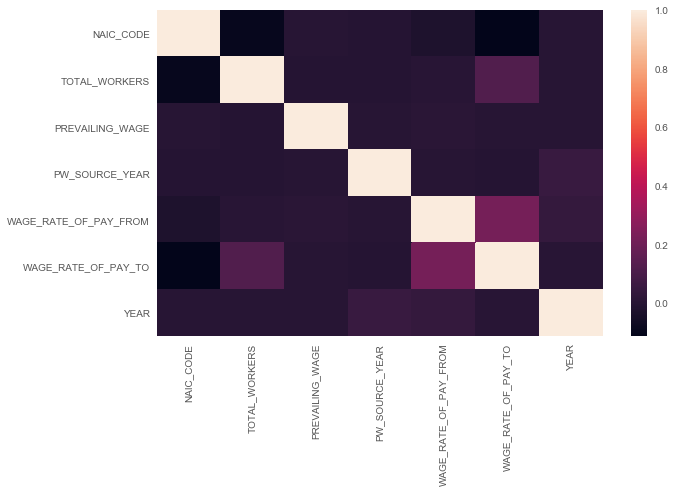

In [175]:
big_cl_model_df['WAGE_RATE_OF_PAY_FROM'] = big_cl_model_df['WAGE_RATE_OF_PAY_FROM'].str.replace(',','').astype(float).apply(lambda x: x/100)
big_cl_model_df['WAGE_RATE_OF_PAY_TO'] = big_cl_model_df['WAGE_RATE_OF_PAY_TO'].str.replace(',','').astype(float).apply(lambda x: x/100)
big_cl_model_df.corr()
htmap=sns.heatmap(big_cl_model_df.corr())

In [18]:
big_cl_model_df['ACCEPTANCE'] = np.where(big_cl_model_df['CASE_STATUS']=='CERTIFIED',1,0)
big_cl_model_df
data = big_cl_model_df[1:5000]
data.shape
mod = sm.ols(formula="ACCEPTANCE ~ YEAR+TOTAL_WORKERS+PREVAILING_WAGE+WAGE_RATE_OF_PAY_FROM+WAGE_RATE_OF_PAY_TO", data=data).fit()

In [19]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ACCEPTANCE   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1.089
Date:                Sun, 22 Apr 2018   Prob (F-statistic):             0.0173
Time:                        19:23:32   Log-Likelihood:                 2294.7
No. Observations:                4999   AIC:                            -379.4
Df Residuals:                    2894   BIC:                         1.334e+04
Df Model:                        2104                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               2.66e-07   6.59e-09     40.337      0.000    2.53e-07    2.79e-07
WAGE_RATE_OF_PAY_FROM[T.1,00,064.84]     -0.0022      0.202     -0.011      0.991      -0.398       0.394
WAGE_RATE_OF_PAY_FROM[T.1,00,200.00]      0.0223      0.202      0.110      0.912      -0.374       0.418
WAGE_RATE_OF_PAY_FROM[T.1,00,212.00]     -0.0041      0.144     -0.028      0.977      -0.286       0.278
WAGE_RATE_OF_PAY_FROM[T.1,00,256.00]      0.0218      0.144      0.152      0.879      -0.260       0.304
WAGE_RATE_OF_PAY_FROM[T.1,00,383.00]      0.0157      0.202      0.078      0.938      -0.380       0.412
WAGE_RATE_OF_PAY_FROM[T.1,00,400.00]     -0.0180      0.206     -0.087      0.930      -0.422       0.386
WAGE_RATE_OF_PAY_FROM[T.1,00,511.00]      0.0202      0.203      0.100      0.920      -0.377       0.417
WAGE_RATE_OF_PAY_FROM[T.1,00,526.00]      0.0608      0.122      0.499      0.618      -0.178       0.300
WAGE_RATE_OF_PAY_FROM[T.1,00,600.00]     -0.0118      0.209     -0.056      0.955      -0.422       0.398
WAGE_RATE_OF_PAY_FROM[T.1,00,610.00]      0.0068      0.162      0.042      0.966      -0.311       0.325
WAGE_RATE_OF_PAY_FROM[T.1,00,715.00]      0.0117      0.101      0.116      0.907      -0.186       0.210
WAGE_RATE_OF_PAY_FROM[T.1,00,800.00]      0.0208      0.202      0.103      0.918      -0.375       0.417
WAGE_RATE_OF_PAY_FROM[T.1,000.00]        -1.0688      0.203     -5.277      0.000      -1.466      -0.672
WAGE_RATE_OF_PAY_FROM[T.1,01,000.00]      0.0150      0.144      0.104      0.917      -0.267       0.297
WAGE_RATE_OF_PAY_FROM[T.1,01,192.00]      0.0240      0.202      0.119      0.905      -0.372       0.420
WAGE_RATE_OF_PAY_FROM[T.1,01,241.00]      0.0210      0.203      0.104      0.917      -0.376       0.418
WAGE_RATE_OF_PAY_FROM[T.1,01,462.00]      0.0121      0.101      0.120      0.904      -0.186       0.210
WAGE_RATE_OF_PAY_FROM[T.1,01,647.00]      0.0214      0.144      0.148      0.882      -0.262       0.304
WAGE_RATE_OF_PAY_FROM[T.1,01,700.00]      0.0091      0.101      0.090      0.929      -0.189       0.207
WAGE_RATE_OF_PAY_FROM[T.1,01,774.00]      0.0239      0.202      0.118      0.906      -0.372       0.420
WAGE_RATE_OF_PAY_FROM[T.1,01,795.00]      0.0246      0.118      0.209      0.835      -0.207       0.256
WAGE_RATE_OF_PAY_FROM[T.1,01,900.00]      0.0236      0.202      0.117      0.907      -0.373       0.420
WAGE_RATE_OF_PAY_FROM[T.1,02,000.00]      0.0041      0.088      0.047      0.963      -0.169       0.177
WAGE_RATE_OF_PAY_FROM[T.1,02,006.04]      0.0214      0.202      0.106      0.916      -0.375       0.418
WAGE_RATE_OF_PAY_FROM[T.1,02,086.00]      0.0228      0.212      0.107      0.915      -0.393       0.439
WAGE_RATE

If you see the heatmap you can pretty much see that there is no correlation that is significant enough for our predictions,
also you can see the R-sqaured value for the model isnt very good and dont provide us with any valuable information that can help us decide on the application status.  

# Conclusion

After this small journey of exploring the visa petitions and based on Jobs title, State, City, Prevailing Wages etc. we have a number of things to infer.

As we have seen if we are trying to build a model to classify the application status we are not getting any satisfactory results and the reason for that being there are huge number of categorical values in columns and the count of columns with numerical values is very less and they dont significantly help in predciting the application status.

We moved our analysis towards visual charts and graphs so that we are in a good position to conclude on how a certain feature affect the outcome of the application status and how different variables effect the H1B visa status in different situtaions.

The data for two years show a decline in visa applications which is obvious due to stringent policies being considered for incoming H1b workers.

We found California , Texas and Newyork to be having the highest number of certified applications and to be specific San-Fransisco, NewYork and Houston come under the cities with most number of certified applicants.

You have higher chances of getting your application denied if you are working in an H1B Independant company

If you take a look at the type of Job-titles you can apply to such that you get the best possible wages across America and have high chances of a CERTIFIED application, Programmer Analyst, Systems Analyst and Software Engineer come on top of this list and best salaries are offered in California followed by Texas and Newyork.

The type of jobs are many but IT jobs hold the highest number of applications and Health Care sector offering the highest wages.

In particular for Programmer Analyst getting a job in Pennsylvania can be very rewarding as it has drastically high salaries for that position.

If it comes to comparing the average salaries with median, California, Texas vary a lot and NewYork pretty much stays around the average this tells us when accpeting an offer in California or Texas, be good at negotiating.

To sum it up if a person had to choose to apply for H1b visa the best bet would be California(San-Fransisco) or Texas(Houston) for a Programmer Analyst/Systems Analyst position that would pay an average salary of 100k+ if negotiated properly and have high chances of getting a CERTIFIED visa petition. 